Different parameters, no improvement, loss ~0.7

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from itertools import chain
from keras.preprocessing.sequence import TimeseriesGenerator
from matplotlib import pyplot as plt
from tensorflow.keras import layers
df = pd.read_csv("drive/MyDrive/Engineer's Project/test.csv")

In [ ]:
df.pop('usa_cpi')
df.pop('pol_cpi')
df.pop('usa_inter')
df.pop('pol_inter')

0       5.82
1       5.82
2       5.82
3       5.82
4       5.82
        ... 
3537    4.83
3538    4.83
3539    4.83
3540    4.83
3541    4.83
Name: pol_inter, Length: 3542, dtype: float64

In [ ]:
df.pop('Date')
float_data = np.array(df).astype('float32')
mean = float_data[:2501].mean(axis=0)
std = float_data[:2501].std(axis=0)
float_data -= mean
float_data /= std

In [ ]:
lookback = 30
step = 1
delay = 1
batch_size = 128

In [ ]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=1):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
        min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][3] ##### HIT KURDE 1 to numer kolumny ktora przewiduje wtf
    yield samples, targets

In [ ]:
train_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=0,
max_index=2501,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=2501,
max_index=3001,
step=step,
batch_size=batch_size)

In [ ]:
test_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=3001,
max_index=3541,
step=step,
batch_size=batch_size)

In [ ]:
val_steps = (3001 - 2501 - lookback)
test_steps = (len(float_data) - 3001 - lookback)

Without shuffle in generator, higher dropout

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.3,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(16,
  activation='sigmoid',
  dropout=0.3,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history = model.fit(train_gen,
  steps_per_epoch=400,
  epochs=80,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/80
400/400 [==============================] - 53s 114ms/step - loss: 0.5958 - val_loss: 0.5636
Epoch 2/80
400/400 [==============================] - 42s 106ms/step - loss: 0.2300 - val_loss: 0.1724
Epoch 3/80
400/400 [==============================] - 43s 107ms/step - loss: 0.1605 - val_loss: 0.0849
Epoch 4/80
400/400 [==============================] - 43s 106ms/step - loss: 0.1320 - val_loss: 0.0745
Epoch 5/80
400/400 [==============================] - 42s 106ms/step - loss: 0.1181 - val_loss: 0.1497
Epoch 6/80
400/400 [==============================] - 42s 106ms/step - loss: 0.1142 - val_loss: 0.1146
Epoch 7/80
400/400 [==============================] - 42s 105ms/step - loss: 0.1082 - val_loss: 0.1106
Epoch 8/80
400/400 [==============================] - 42s 105ms/step - loss: 0.1083 - val_loss: 0.1068
Epoch 9/80
400/400 [==============================] - 42s 106ms/step - loss: 0.1043 - val_loss: 0.0631
Epoch 10/80
400/400 [==============================] - 42s 106ms/step - l

In [ ]:
eval = model.evaluate(test_gen, steps = test_steps)
eval *std[3]

526/526 [==============================] - 9s 17ms/step - loss: 0.1239


0.04625031190197215

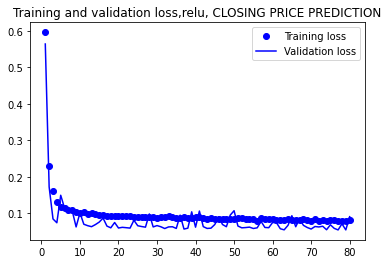

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

No big difference, return to shuffle = True

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(5,
  activation='sigmoid',))
model1.add(layers.Dense(1))
model1.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history1 = model1.fit(train_gen,
  steps_per_epoch=400,
  epochs=80,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/80
400/400 [==============================] - 33s 77ms/step - loss: 0.2093 - val_loss: 0.2155
Epoch 2/80
400/400 [==============================] - 30s 76ms/step - loss: 0.1099 - val_loss: 0.1245
Epoch 3/80
400/400 [==============================] - 31s 77ms/step - loss: 0.1106 - val_loss: 0.0459
Epoch 4/80
400/400 [==============================] - 31s 76ms/step - loss: 0.0921 - val_loss: 0.0474
Epoch 5/80
400/400 [==============================] - 30s 76ms/step - loss: 0.1035 - val_loss: 0.1152
Epoch 6/80
400/400 [==============================] - 30s 76ms/step - loss: 0.0938 - val_loss: 0.0933
Epoch 7/80
400/400 [==============================] - 31s 78ms/step - loss: 0.0923 - val_loss: 0.0566
Epoch 8/80
400/400 [==============================] - 31s 77ms/step - loss: 0.0898 - val_loss: 0.0463
Epoch 9/80
400/400 [==============================] - 31s 76ms/step - loss: 0.0884 - val_loss: 0.0662
Epoch 10/80
400/400 [==============================] - 31s 76ms/step - loss: 0.087

In [ ]:
eval1 = model1.evaluate(test_gen, steps = test_steps)
eval1 *std[3]

526/526 [==============================] - 15s 28ms/step - loss: 0.0781


0.029179422209747452

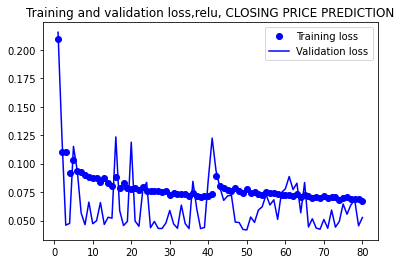

In [ ]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs1 = range(1, len(loss1) + 1)
plt.figure()
plt.plot(epochs1, loss1, 'bo', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Best model, relu/sigmoid, RMSprop

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model2.add(layers.Dense(5,
  activation='relu',))
model2.add(layers.Dense(1))
model2.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history2 = model2.fit(train_gen,
  steps_per_epoch=400,
  epochs=80,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/80
400/400 [==============================] - 39s 90ms/step - loss: 0.1541 - val_loss: 0.0981
Epoch 2/80
400/400 [==============================] - 33s 82ms/step - loss: 0.1030 - val_loss: 0.1018
Epoch 3/80
400/400 [==============================] - 32s 80ms/step - loss: 0.0938 - val_loss: 0.0848
Epoch 4/80
400/400 [==============================] - 32s 80ms/step - loss: 0.0892 - val_loss: 0.0527
Epoch 5/80
400/400 [==============================] - 31s 79ms/step - loss: 0.0862 - val_loss: 0.0575
Epoch 6/80
400/400 [==============================] - 32s 81ms/step - loss: 0.0837 - val_loss: 0.0873
Epoch 7/80
400/400 [==============================] - 32s 80ms/step - loss: 0.0815 - val_loss: 0.0496
Epoch 8/80
400/400 [==============================] - 31s 78ms/step - loss: 0.0793 - val_loss: 0.0682
Epoch 9/80
400/400 [==============================] - 31s 78ms/step - loss: 0.0773 - val_loss: 0.0710
Epoch 10/80
400/400 [==============================] - 31s 79ms/step - loss: 0.076

In [ ]:
eval2 = model2.evaluate(test_gen, steps = test_steps)
eval2 *std[3]

526/526 [==============================] - 8s 15ms/step - loss: 0.0941


0.03513766923808137

In [ ]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.figure()
plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Best model, Adam(), lookback set to 45, 60

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model3.add(layers.Dense(5,
  activation='sigmoid',))
model3.add(layers.Dense(1))
model3.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history3 = model3.fit(train_gen,
  steps_per_epoch=400,
  epochs=80,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/80
400/400 [==============================] - 104s 230ms/step - loss: 0.2461 - val_loss: 0.1270
Epoch 2/80
400/400 [==============================] - 87s 217ms/step - loss: 0.1013 - val_loss: 0.0806
Epoch 3/80
400/400 [==============================] - 84s 211ms/step - loss: 0.0838 - val_loss: 0.0707
Epoch 4/80
400/400 [==============================] - 84s 210ms/step - loss: 0.0778 - val_loss: 0.0707
Epoch 5/80
400/400 [==============================] - 84s 209ms/step - loss: 0.0743 - val_loss: 0.0600
Epoch 6/80
400/400 [==============================] - 84s 210ms/step - loss: 0.0716 - val_loss: 0.0813
Epoch 7/80
400/400 [==============================] - 84s 211ms/step - loss: 0.0703 - val_loss: 0.0783
Epoch 8/80
400/400 [==============================] - 84s 210ms/step - loss: 0.0694 - val_loss: 0.0702
Epoch 9/80
400/400 [==============================] - 84s 210ms/step - loss: 0.0679 - val_loss: 0.0564
Epoch 10/80
400/400 [==============================] - 84s 210ms/step - 

In [ ]:
eval3 = model3.evaluate(test_gen, steps = test_steps)
eval3 *std[3]

496/496 [==============================] - 17s 35ms/step - loss: 0.0773


0.02886756105204702

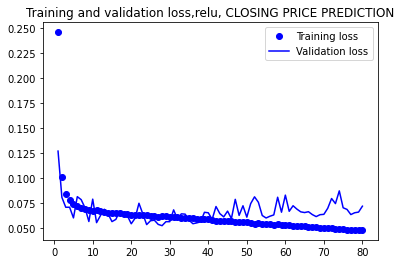

In [ ]:
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs3 = range(1, len(loss3) + 1)
plt.figure()
plt.plot(epochs3, loss3, 'bo', label='Training loss')
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

 lookback = 60

In [ ]:
model4 = tf.keras.models.Sequential()
model4.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model4.add(layers.Dense(5,
  activation='sigmoid',))
model4.add(layers.Dense(1))
model4.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history4 = model4.fit(train_gen,
  steps_per_epoch=400,
  epochs=80,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/80
400/400 [==============================] - 114s 279ms/step - loss: 0.1464 - val_loss: 0.0930
Epoch 2/80
400/400 [==============================] - 125s 313ms/step - loss: 0.0831 - val_loss: 0.0770
Epoch 3/80
400/400 [==============================] - 112s 281ms/step - loss: 0.0788 - val_loss: 0.0624
Epoch 4/80
400/400 [==============================] - 110s 274ms/step - loss: 0.0751 - val_loss: 0.0705
Epoch 5/80
400/400 [==============================] - 109s 274ms/step - loss: 0.0729 - val_loss: 0.0573
Epoch 6/80
400/400 [==============================] - 110s 274ms/step - loss: 0.0710 - val_loss: 0.0601
Epoch 7/80
400/400 [==============================] - 114s 286ms/step - loss: 0.0694 - val_loss: 0.0595
Epoch 8/80
400/400 [==============================] - 110s 276ms/step - loss: 0.0687 - val_loss: 0.0548
Epoch 9/80
400/400 [==============================] - 111s 278ms/step - loss: 0.0684 - val_loss: 0.0639
Epoch 10/80
400/400 [==============================] - 111s 277m

In [ ]:
eval4 = model4.evaluate(test_gen, steps = test_steps)
eval4 *std[3]

481/481 [==============================] - 22s 45ms/step - loss: 0.0800


0.02988566450695851

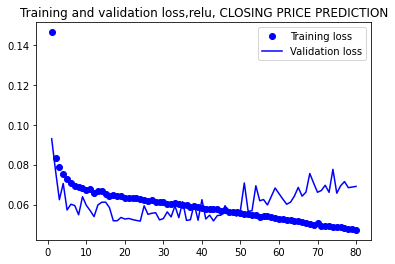

In [ ]:
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']
epochs4 = range(1, len(loss4) + 1)
plt.figure()
plt.plot(epochs4, loss4, 'bo', label='Training loss')
plt.plot(epochs4, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

lookback = 10

In [ ]:
model5 = tf.keras.models.Sequential()
model5.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model5.add(layers.Dense(5,
  activation='sigmoid',))
model5.add(layers.Dense(1))
model5.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history5 = model5.fit(train_gen,
  steps_per_epoch=400,
  epochs=80,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/80
400/400 [==============================] - 25s 55ms/step - loss: 0.3257 - val_loss: 0.1975
Epoch 2/80
400/400 [==============================] - 22s 55ms/step - loss: 0.1278 - val_loss: 0.0758
Epoch 3/80
400/400 [==============================] - 24s 59ms/step - loss: 0.0949 - val_loss: 0.0595
Epoch 4/80
400/400 [==============================] - 23s 58ms/step - loss: 0.0841 - val_loss: 0.0500
Epoch 5/80
400/400 [==============================] - 24s 59ms/step - loss: 0.0796 - val_loss: 0.0598
Epoch 6/80
400/400 [==============================] - 22s 55ms/step - loss: 0.0757 - val_loss: 0.0560
Epoch 7/80
400/400 [==============================] - 22s 56ms/step - loss: 0.0730 - val_loss: 0.0506
Epoch 8/80
400/400 [==============================] - 23s 56ms/step - loss: 0.0711 - val_loss: 0.0719
Epoch 9/80
400/400 [==============================] - 23s 56ms/step - loss: 0.0694 - val_loss: 0.0471
Epoch 10/80
400/400 [==============================] - 22s 56ms/step - loss: 0.069

In [ ]:
eval5 = model5.evaluate(test_gen, steps = test_steps)
eval5 *std[3]

531/531 [==============================] - 6s 11ms/step - loss: 0.0864


0.03224405348378023

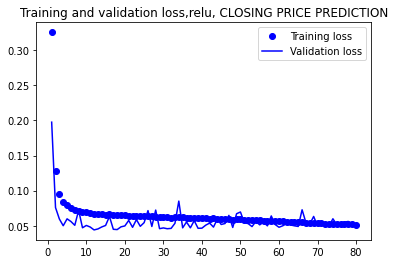

In [ ]:
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']
epochs5 = range(1, len(loss5) + 1)
plt.figure()
plt.plot(epochs5, loss5, 'bo', label='Training loss')
plt.plot(epochs5, val_loss5, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

activation = softmax, lookback = 30

In [ ]:
model6 = tf.keras.models.Sequential()
model6.add(layers.LSTM(128,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model6.add(layers.Dense(5,
  activation='softmax',))
model6.add(layers.Dense(1))
model6.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history6 = model6.fit(train_gen,
  steps_per_epoch=400,
  epochs=80,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/80
400/400 [==============================] - 26s 58ms/step - loss: 0.8049 - val_loss: 0.6857
Epoch 2/80
400/400 [==============================] - 23s 57ms/step - loss: 0.2945 - val_loss: 0.1668
Epoch 3/80
400/400 [==============================] - 23s 58ms/step - loss: 0.1730 - val_loss: 0.0725
Epoch 4/80
400/400 [==============================] - 23s 58ms/step - loss: 0.1171 - val_loss: 0.0731
Epoch 5/80
400/400 [==============================] - 23s 58ms/step - loss: 0.0942 - val_loss: 0.0687
Epoch 6/80
400/400 [==============================] - 23s 58ms/step - loss: 0.0858 - val_loss: 0.0614
Epoch 7/80
400/400 [==============================] - 23s 58ms/step - loss: 0.0825 - val_loss: 0.0526
Epoch 8/80
400/400 [==============================] - 23s 58ms/step - loss: 0.0798 - val_loss: 0.0549
Epoch 9/80
400/400 [==============================] - 23s 58ms/step - loss: 0.0793 - val_loss: 0.0547
Epoch 10/80
400/400 [==============================] - 23s 58ms/step - loss: 0.077

In [ ]:
eval6 = model6.evaluate(test_gen, steps = test_steps)
eval6 *std[3]

531/531 [==============================] - 10s 18ms/step - loss: 0.0735


0.02743055664777172

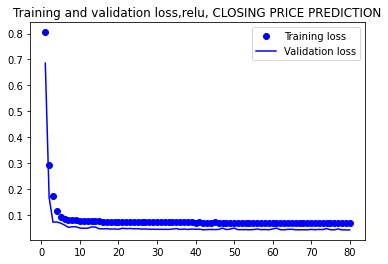

In [ ]:
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']
epochs6 = range(1, len(loss6) + 1)
plt.figure()
plt.plot(epochs6, loss6, 'bo', label='Training loss')
plt.plot(epochs6, val_loss6, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()